# Computational methods in Physics
## Week 10
#### Prof. Michael Wood-Vasey
##### [based on materials from Prof. Brian D'Urso]
##### University of Pittsburgh, Department of Physics and Astronomy

### Why Is Nature So Complicated?

* Insect populations, weather patterns
* Complex behavior
* Stable,  periodic,   chaotic, stable, ...
*  **Problem:** can a simple, discrete law produce such complicated behavior?

### Logistic Map
#### Model Realistic Problem: ~~Bug~~ Insect Cycles

##### Insects Reproduce Generation after Generation = $i$

*   $N_0\ \rightarrow \  N_1, N_2, \ldots  N_\infty$
*  $N_i = f(i)?$
* We've previously discussed discrete radioactive decay,
\begin{eqnarray}
\frac{\Delta N}{\Delta t} =\ & -\lambda N
\Rightarrow\   \simeq\ & e^{-\lambda t}
\end{eqnarray}
*  If $\lambda < 0$ $\implies$  growth

$$
\frac{\Delta N_i}{\Delta t} = \lambda \; N_i
$$

![Family of cockroaches](figures/cockroach.jpg)

#### Refine Model: Maximum Population $N_*$

We do not observe an exponentially increasing population of insects overall.  What limits the growth of the population?  Can we estimate the maximum population, $N_{*}$?

##### Incorporate Carrying Capacity into Rate

* Assume  breeding rate proportional to number of insects:
$$
\frac{\Delta N_i}{\Delta t} = \lambda \; N_i
$$
 * Want growth rate   $\downarrow$  as  $N_i \rightarrow N_{*}$
 * Assume $\lambda=\lambda' (N_*-N_i)$
$$
\Rightarrow\ \ 
\boxed{
\frac{\Delta N_i}{\Delta t} =
\lambda'(N_{*}-N_i)N_i \quad \quad \mbox{(Logistic Map)}
}
$$
* Small $N_i/N_*$ $\implies$ exponential growth
*  $N_i \rightarrow N_*$  $\implies$ slow growth, stable, decay

#### Logistic as Map in Dimensionless Variables

We can write this more generally with a change of variables:

First break out explicitly into successive steps:

$$
N_{i+1} = N_i + \lambda' \, \Delta t (N_{*}-N_i)N_i
$$

Then define

$$
x_{i} \simeq \frac{N_i}{N_{*}} = \mbox{fraction of maximum}
$$

and 
$$
\begin{align}
\mu \equiv & 1 + \lambda' \,\Delta  t N_{*}, \quad \quad
x_{i} \equiv \frac{\lambda' \,  \Delta  t}{\mu} N_i\simeq
\frac{N_i}{N_{*}} \\
\end{align}
$$

$$
\boxed{
x_{i+1} = \mu x_{i}(1- x_{i}) \quad\quad\mbox{(Logistic Map)}
}
$$

Note:
*   $0 \leq x_{i} \leq 1$
* This is a map because: $x_{i+1} = f(x_i)$
* Quadratic function,  1-D map
* $f(x) = \mu x(1-x)$

### Properties
#### Properties of Nonlinear Maps (Theory)

Empirical Study: Plot  $x_i$ *vs*  $i$  
![](figures/Populations.png)
* A: $\mu = \textrm{2.8}$, equilibration into single population
* B:  $\mu = \textrm{3.3}$, oscillation between 2 population levels
* C:  $\mu = \textrm{3.5}$ oscillation among 4 levels
* D:    chaos

### Attractors
#### Fixed Points
A *fixed point* is where $x_{i}$ stays at $x_{*}$ or returns after some finite number of iterations.

For the equation:
$$
x_{i+1} = \mu x_i (1-x_i)
$$

* A *One-cycle* fixed point would be: $x_{i+1} = x_{i} = x_{*}$
  - If this happens, then we can figure out where:
$$
\mu x_{*} (1-x_{*}) =  x_{*} \quad 
\implies\  x_{*} = 0\quad {\rm or}\quad \frac{\mu - 1}{\mu}
$$

#### Period Doubling, Attractors
Unstable via  Bifurcation into 2-Cycle

* Attractors, cycle points
* A *Two-cycle* fixed point would be same population in generations $i$ and $i+2$
$$
x_{i} = x_{i+2} = \mu x_{i+1}(1-x_{i+1}) \Rightarrow
x_{*} = \frac{1+\mu \pm \sqrt{\mu^{2}-2\mu -
3}}{2\mu}
$$
* If $\mu>3$: there are real solutions and we split from one value to two values for $x_*$.
* As $\mu$ increases this splitting from 1 $\rightarrow$ 2 populations continues and bifurcates.

Let's plot the value of $x_*$ vs. $\mu$:

![](figures/bugcolor2.png)

Let's pause for a moment.  What is this diagram?  

It is a plot of the final steady-state value $x_*$ for $f(x)=\mu x(1-x)$.  For $\mu<3$ there is only one such final steady-state value (fixed point).  For $\mu>=3$, there are multiple such values.

In [3]:
def logistic_map(x0, mu, N):
    """Calculate the logitistic map for the given input.
       
    x[i+1] = mu x[i] (1 - x[i])
    
    Inputs
    ------
    x0 -- Initial value for x.  [scalar]
    mu -- Controlling logistic parameter.  [scalar]
    
    Outputs
    -------
    x -- Iterative values of logistic map.  Array of size N.
    
    Notes
    -----
    This really begs to be implemented as a recursive function
    but Python doesn't support tail-end recursion, 
    so we would blow the stack for any significant N.
    """
    import numpy as np
    
    x = np.zeros(N)
    x[0] = x0
    for i in range(N-1):
        x[i+1] = mu*x[i]*(1-x[i])
        
    return x

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

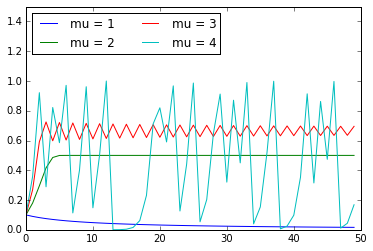

In [19]:
(x0, mu, N) = (0.1, 2, 50)
x = {}
for mu in (1, 2, 3, 4):
    x[mu] = logistic_map(x0=x0, mu=mu, N=N)
    plt.plot(x[mu], label='mu = %g' % mu)
    
plt.ylim(0,1.5)
plt.legend(loc='upper left', ncol=2)

Let's pause again.  How should we illustrate this behavior?  I.e., even once we understand the actual concept, what are we specifically plotting?  How do we represent the behavior of the system?  How should we visualize and explore the behavior?
 * We aren't varying intensity.
 * We're varying point density
 *  $3000 \times 3000 \simeq 10^7$ pts
 * To plot 3000 points over one page (11") we need resolution $\sim$  300 DPI
 * Big, more = waste
 * Create 1000 bins
 * $1 \leq \mu \leq 4$
 * Print $x_{*}$  3-4 decimal places
 * Remove duplicates
 * Enlarge:  {self-similarity}
 *  Observe  windows

Problem: Realistic Single or Double Pendulum

Simulate Nonlinear, Chaotic System

   * Driven single pendulum
   * Free, double pendulum
   * Large oscillations, even over-the-top

![](figures/BothPends.png)

### ODE

#### Chaotic Pendulum ODE
##### Newton's Laws for Rotational Motion   $\sum \tau \,=\, I \ \frac{d^2\theta}{dt^2}$

![](figures/SinglePend.png)

 *  Gravitation $\tau$: $-mgl\sin\theta$
 * Friction $\tau$:   $-\beta\dot{\theta}$
 * External $\tau$:  $\tau_0\cos \,\omega t$


\begin{align}
I\, \frac{d^{2}\theta} {dt^{2}} = &   - {mgl}\, \sin\theta
 - \beta \, \frac{d\theta}{dt}
  + \tau_{0} \cos\omega t
 { \frac{d^{2}\theta} {dt^{2}}   =}  &
  {-\omega_{0}^{2}  \,\sin \theta  -\alpha \,\frac{d\theta}{dt} +
f\cos\omega t}
\end{align}

$$
\omega_{0}    =  \frac{mgl}{I},\quad \alpha =
\frac{\beta}{I}, \quad f =\frac{\tau_0}{I}
$$

#### Chaotic Pendulum ODE
##### Standard ODE Form (rk4): $\quad \dot{\vec{y}} = \vec{f}(\vec{y}, t)$}

![](figures/SinglePend.png)


  $$ \frac{d^{2}\theta}{dt^{2}}   =
-\omega_{0}^{2}  \,\sin \theta  -\alpha \,\frac{d\theta}{dt} +
f\cos\omega t
$$

 * 2$^{nd}$ O t-dependent nonlinear ODE
* Nonlinearity:  $\sin\theta \simeq \theta -\theta^3/3! \cdots$
 * $ y^{(0)} =  \theta(t), \quad y^{(1)} = \frac{d\theta(t)}{dt}$

  \begin{align}
{\frac{dy^{(0)}}{dt} \ =\ }&  {y^{(1)}}
{\frac{dy^{(1)}}{dt}  \ =\  }& {- \omega_{0}^{2} \sin y^{(0)} - \alpha
y^{(1)} + f\cos\omega t}
\end{align}

### Free Pendulum

#### Start Simply: Free Oscillations (Test Algorithm \& Physics)
Ignore Friction \& External Torques ($f= \alpha = 0$)

![](figures/FreePend.png)

\begin{align}
 {\ddot{\theta}  =} & {-\omega_{0}^{2} \sin \theta }  \label{6}
  \ddot{\theta} \  \simeq\  & -\omega_0^2 \theta \quad\quad \mbox{(linear,  $\theta\simeq 0$)}\nonumber
 \Rightarrow \enskip\theta(t) \ =\  & \theta_{0} \sin(\omega_{0} t
+ \phi)
\end{align}

''Analytic solution''; sort of:

$$
 T  \propto
\int_{0}^{\theta_m}\frac{d\theta}{ \left[\sin^{2}({\theta_m}/{2})
- \sin^{2}({\theta}/{2})\right]^{1/2}}
$$

#### Visualization: Phase Space Orbits
##### Abstract Space: $v(t)$ vs $x(t)\ $ ($x$ vs $t$, $v$ vs $t$= Complicated)}

![](figures/Fig127Mod.png)

* Geometry easy to "see"
* SHM: Ellipse, $E\rightarrow$ size
* Anharmonic:  + corners

 * Ossc $\implies$ CW Closed
 * Non Ossc, repulse = open

\begin{align}
x(t)=&  A \sin(\omega t),\quad v(t)   = \omega A
\cos(\omega t)\quad (SHM)
E  = & {\rm KE} + {\rm PE} =   m {v^{2}}/2 +
 \omega^{2}m^{2}{x^{2}}/2=  \mbox{ellipse}
\end{align}

#### Undriven, Frictionless Pendulum in Phase Space

Separatrix  Separates Open \& Closed Orbits
![](figures/Fig128leftMod.png)

  * Closed: oscillation
  * Open: rotation
  * Both: periodic
 *  Orbits do not cross

 *  Open orbits touch
 * Hyperbolic points
 * Unstable equilibrium

#### Include Friction, Driving Torque (small t steps)

##### Geometry Tends to Remain

![](figures/Limit.png)

 *  Friction $\implies$ $\downarrow$ E
 *  Inward Spiral
 * $\tau_{\rm ext}$ can put $E$ back

 * Limit cycle = Balance
 * $<\tau_{\rm ext}> \ = \ <\mbox{friction}> $

#### Chaos As Viewed in Phase Space (Full Solution)

##### Look for in Your Simulations

![](figures/PSplotPend.png)

  * Complex $\leq$ Chaos $\leq$ Rand
  * Fixed Params, all $x_0$, $t$s:  flows

 * Chaos complex $\neq$ mess
 * Figs distort, remains
 * Closed = periodic
 * Simplicity in chaos [PS, $\neq \theta(t)$]
  * $\rightarrow$ attractors (return)
  * Random = cloud fill $E$
  * {Bands} $\implies$ continuity, sequential
  * $\implies$ hypersensitive $\theta(t)$
  * Tools measure chaos

### Double Pendulum
#### Double Pendulum: Alternative Problem

##### Chaos without External Torque or Friction
![](figures/DoublePendPhoto.png})

* No small-$\theta$
* Coupling = extra degree freedom
* Small $\theta$: in-$\phi$, out-$\phi$


\begin{align}
L =& {\rm KE}-{\rm PE} =  (m_1+m_2) l_1^2
\dot{\theta_1}^2/2 +  m_2l_2^2\dot{\theta_2}^2/2\\
& +\, m_2l_1l_2
\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2) +(m_1+m_2)g
l_1\cos\theta_1 + m_2g l_2\cos\theta_2 \nonumber
\Rightarrow\quad & (m_1+m_2)l_1\ddot{\theta_1} +
m_2l_2\ddot{\theta_2}\cos(\theta_1-\theta_2) + m_2 l_2 \dot{\theta_2}^2
\sin(\theta_1-\theta_2)
&\quad + g(m_1+m_2)\sin\theta_1 = 0  \nonumber\\
&m_2l_2\ddot{\theta_2}+m_2l_1\ddot{\theta_1}\cos(\theta_1-\theta_2)-
m_2l_1\dot{\theta_1}^2\sin(\theta_1-\theta_2)  +  mg\sin\theta_2 =
0
\end{align}

#### Double Pendulum: Bifurcations

![](figures/DoublePend.png)
![](figures/DoublePendBifur.png)